In [1]:
import numpy as np
import pandas as pd
import scipy

from IPython.display import clear_output

import sys
sys.path.append('../../../../Documents/GitHub/gustav/src/')

from gustav import ebi, ncbi, nlm, biogrid, nih
from gustav import publications
from gustav import github
from gustav import access_framework
from gustav import mapper

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../general/src/')
from manuscript import export
from manuscript import inout
from manuscript import datasets
from manuscript import tools

from sklearn.metrics import auc
from scipy.stats import fisher_exact
pd.options.display.precision = 3
pd.options.display.expand_frame_repr = False
pd.options.display.max_columns = 20

# Figure S24
Just queries of the quoted phrases on Google Scholar and Dimensions. Nothing fancy here

meta NOT subset; don't know how to subset; dropped


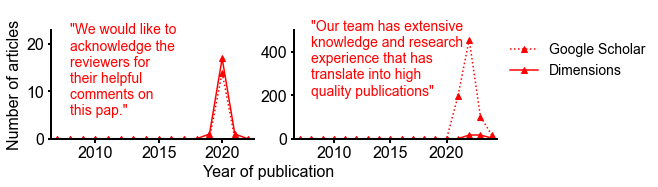

In [5]:
linewidth=2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,2))
ax = axes[0]

data_df = pd.read_csv('../data/pap_dimensions_240709.csv')

data_df = data_df.set_index('year')
data_df = data_df.reindex(np.arange(2000,2025,1)).fillna(0.0)

ax.plot(data_df['wrong_tot_scholar'], marker='^', color='r', linestyle='dotted')
ax.plot(data_df['wrong_tot'], marker='^', color='r')

for ax in axes:
    ax.set_xlim([2006.5, 2022.5])
    ax.set_ylim([0, 23])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    [ax.spines[i].set_linewidth(2) for i in ax.spines]
    ax.tick_params(labelsize=16, axis='both', width=linewidth)
    ax.tick_params(axis='y', labelcolor='k')
    
axes[0].text(s='''
"We would like to
acknowledge the 
reviewers for
their helpful 
comments on 
this pap."''', 
              fontsize=14, color='r', rotation=0, ha='left', x=2008, y=5)
axes[0].set_ylabel('Number of articles', fontsize=16)


ax = axes[1]
data_df = pd.read_csv('../data/cumulative_our_team_240709.csv')

data_df = data_df.set_index('year')
data_df = data_df.reindex(np.arange(2000,2025,1)).fillna(0.0)
data_df['tot'] = [0.0] + list(np.diff(data_df['cumulative']))

ax.plot(data_df['tot'], marker='^', color='r', linestyle='dotted', label='Google Scholar')
ax.plot(data_df['dimensions_tot'], marker='^', color='r', label='Dimensions')

for ax in [ax]:
    ax.set_xlim([2006.5, 2024.5])
    ax.set_ylim([0, 500])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    [ax.spines[i].set_linewidth(2) for i in ax.spines]
    ax.tick_params(labelsize=16, axis='both', width=linewidth)
    ax.tick_params(axis='y', labelcolor='k')
    
ax.text(s='''"Our team has extensive 
knowledge and research 
experience that has 
translate into high 
quality publications"''', 
              fontsize=14, color='r', rotation=0, ha='left', y=200, x=2008)
axes[1].set_xlabel('Year of publication', fontsize=16, ha='left', x=-0.45)
axes[1].legend(fontsize=14, bbox_to_anchor=(1,1), loc='upper left', frameon=False)

plt.savefig('../img/weird_sentences_timelines_240709.png', dpi=200, bbox_inches='tight')
plt.savefig('../img/weird_sentences_timelines_240709.pdf', bbox_inches='tight')